In [20]:
import datetime
import importlib
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import utils
from utils.download import get_data

In [21]:
_ = importlib.reload(utils.download)

In [22]:
data, params = get_data()

[*********************100%%**********************]  1 of 1 completed


In [23]:
data['returns'] = data.interpolate(type='linear').pct_change()

In [24]:
train, test = data.loc[:params['test']-datetime.timedelta(days=1), ], data.loc[params['test']:, ]

# Metoda historyczna

In [25]:
alpha = .95

In [26]:
data['var95'] = data.returns.rolling(window=250).quantile(alpha)

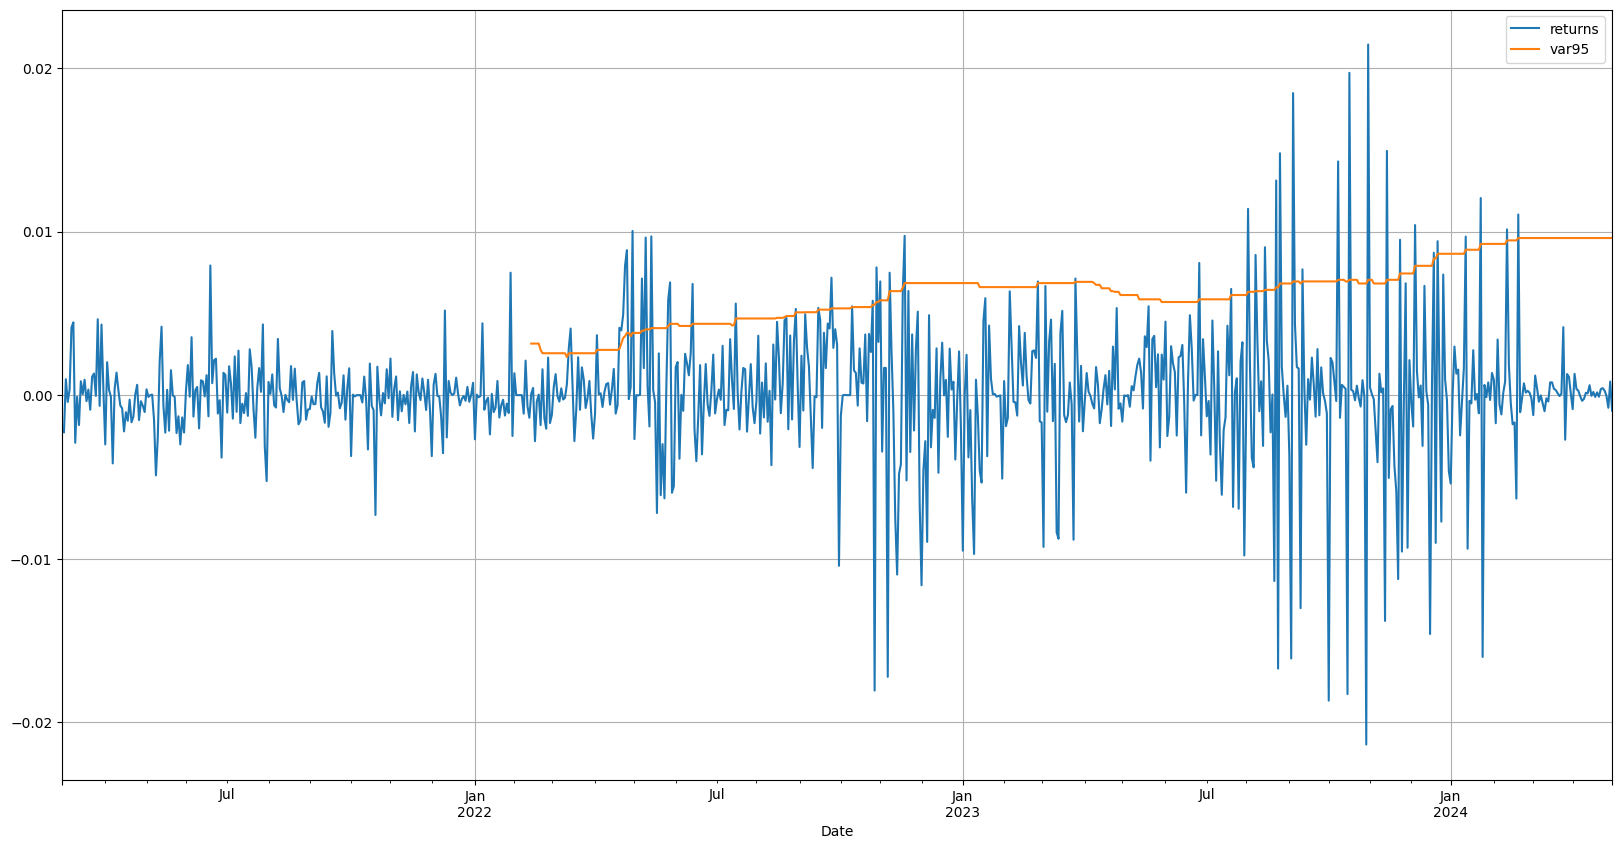

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
_ = data[['returns', 'var95']].\
    plot(ax=ax, grid=True)

In [56]:
data['exceeds'] = np.where(data['returns'] > data['var95'], 1, 0)
data.loc[data['var95'].isna(), 'exceeds'] = np.nan

In [58]:
data['procent przekroczeń'] = data.exceeds.rolling(window=50).sum()/50

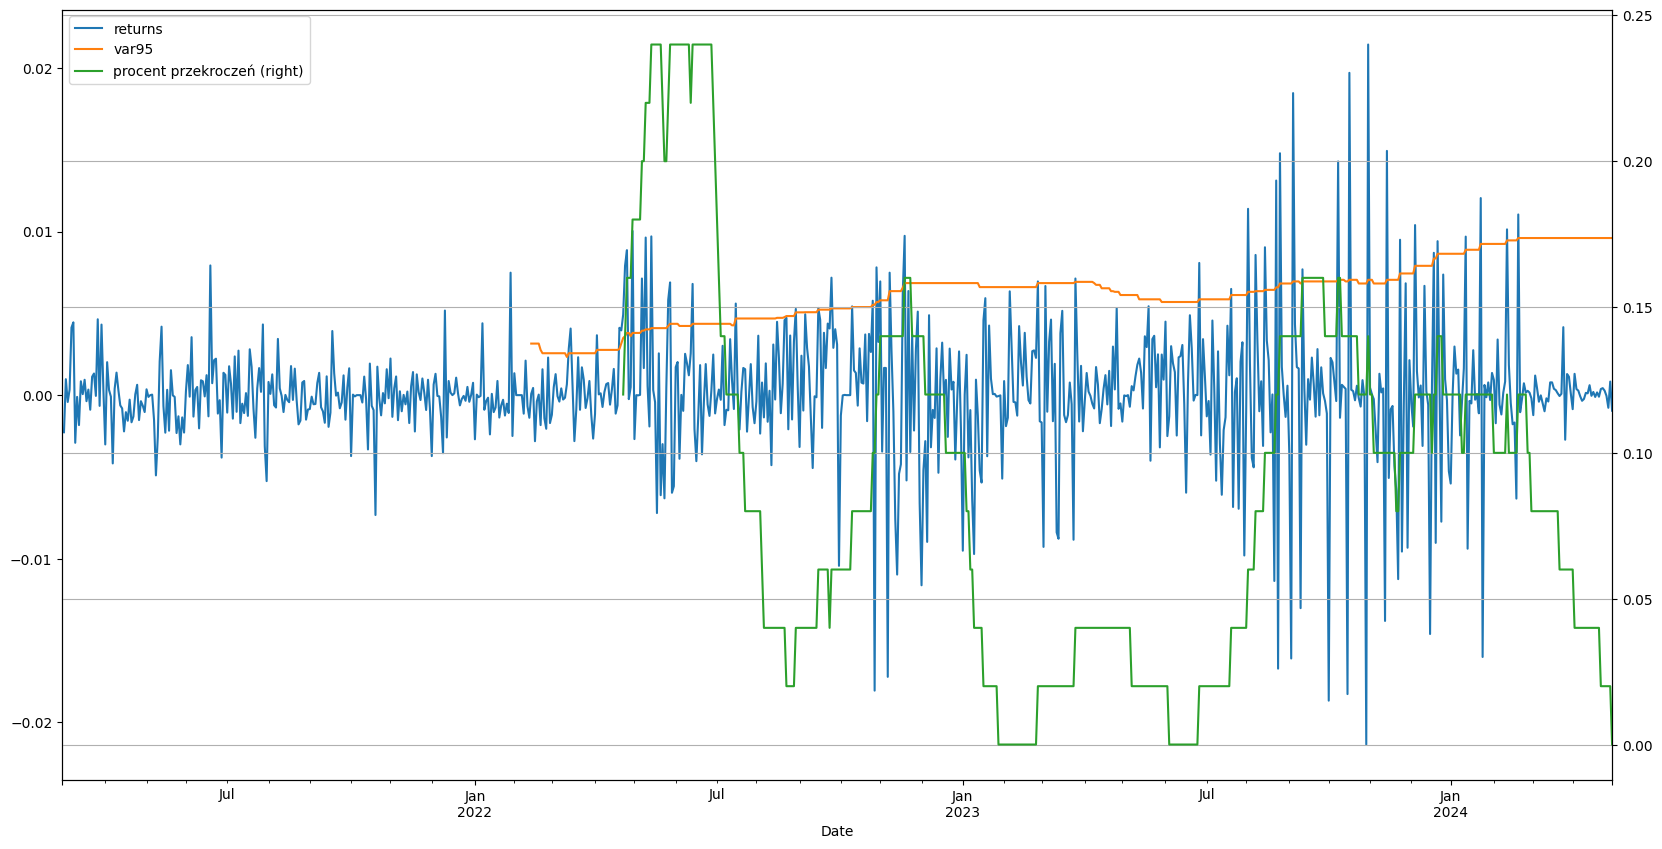

In [59]:
_, ax = plt.subplots(figsize=(20,10))
_ = data.drop(columns=['Close', 'exceeds']).plot(ax=ax, secondary_y=['procent przekroczeń'], grid=True)

## Testowanie wsteczne

In [60]:
I = data.dropna().exceeds # wektor przekroczeń

### Rozkład dwumianowy

In [29]:
print('Średnia z przekroczeń = {}, 1 - {} = {}.\nWariancja z przekroczeń = {}, {}(1 - {}) = {}.'.\
    format(*map(lambda x: np.round(x, 3),
                [I.mean(), alpha, 1- alpha,
                 I.var(), alpha, alpha, alpha * (1 - alpha)])))

Średnia z przekroczeń = 0.083, 1 - 0.95 = 0.05.
Wariancja z przekroczeń = 0.076, 0.95(1 - 0.95) = 0.048.


In [32]:
stats.binomtest(I.sum(), n=I.size, p=1-alpha)

BinomTestResult(k=48, n=577, alternative='two-sided', statistic=0.0831889081455806, pvalue=0.0007456962234526996)